## Perceptron - different alfas

In [39]:
import pandas as pd
from data import *
plt.style.use('ggplot')

In [40]:
repetitions = 200
estimate_func = lambda v: unipolar(0, v)
x_all = reproduce_x_times(x_unipolar, repetitions)
d_all = reproduce_x_times(d_unipolar, repetitions)
x_all = x_all + get_random_except_first_row(x_all.shape)
x_all[:, :5], d_all[:, :5]

(array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
          1.00000000e+00,  1.00000000e+00],
        [ 3.51722291e-02, -8.33935392e-04,  1.03376955e+00,
          1.03339546e+00, -1.84356717e-03],
        [-6.10264840e-03,  1.03408024e+00, -2.63720660e-02,
          9.95866313e-01,  3.07432785e-02]]),
 array([[0, 0, 0, 1, 0]]))

In [41]:
test_size = int(x_all.shape[1] * 0.25)
train_size = int(x_all.shape[1] - test_size)
x_train, x_test = x_all[:, :train_size], x_all[:, train_size:]
d_train, d_test = d_all[:, :train_size], d_all[:, train_size:]
x_train.shape, x_test.shape, d_train.shape, d_test.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [42]:
x_range = np.arange(-2, 4)
experiments_numb = 1000

### Dane experymentów

In [43]:
perceptrons = []
for alfa in list(np.linspace(0, 1, num=100))[1:]:
    p = Perceptron(x_train, d_train, x_test, d_test, estimate_func, alfa, (-0.1, 0.1))
    for i in range(experiments_numb):
        p.count()
    perceptrons.append(p)
len(perceptrons)

99

,alfa,epoch count
0,0.010101,6.768
1,0.020202,7.343
2,0.030303,7.760
3,0.040404,7.641
4,0.050505,7.517
...,...,...
94,0.959596,7.173
95,0.969697,7.136
96,0.979798,7.061
97,0.989899,7.130


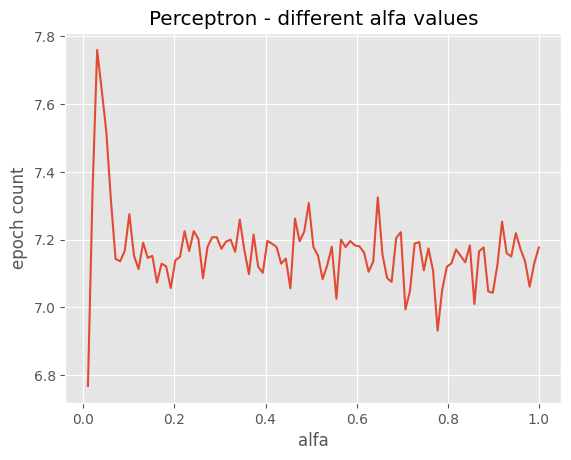

In [45]:
x, y = [v.alfa for v in perceptrons], [v.average_epoch_count for v in perceptrons]
plt.plot(x, y)
plt.title("Perceptron - different alfa values")
plt.xlabel("alfa")
plt.ylabel("average epoch count")
pd.DataFrame({"alfa":x, "average epoch count":y})